##
## Getting the Tangled module installed, so that the functions we established can use here
##

In [1]:
!pwd

/home/sarahpayne/gfms-from-scratch.github.io


In [2]:
# Have to use % to persist
%cd /home/sarahpayne/gfms-from-scratch.github.io

/home/sarahpayne/gfms-from-scratch.github.io


In [3]:
#!pip install -e.

In [4]:
import geogfm

2025-10-05 16:21:06,161 - INFO - Analysis results exported to: /home/sarahpayne/gfms-from-scratch.github.io/week1_output
2025-10-05 16:21:06,163 - INFO - Data exported - use load_week1_data() to reload


In [5]:
dir(geogfm)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'c01',
 'calculate_band_statistics',
 'calculate_ndvi',
 'create_rgb_composite',
 'create_scene_tiles',
 'export_analysis_results',
 'get_scene_info',
 'get_subset_from_scene',
 'load_sentinel2_bands',
 'load_week1_data',
 'normalize_band',
 'plot_band_comparison',
 'save_geotiff',
 'search_STAC_scenes',
 'search_sentinel2_scenes',
 'setup_planetary_computer_auth',
 'test_subset_functionality',
 'verify_environment']

##
### BELOW IS COMPLETE SET-UP
##

In [6]:
# Standard library imports
import logging
import time
import os
from datetime import datetime, timedelta
from pathlib import Path

# Set up logger
logger = logging.getLogger(__name__)
logger.info("✅ Standard library imports complete")

2025-10-05 16:21:06,213 - INFO - ✅ Standard library imports complete


In [7]:
# Core data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

logger.info("✅ Data science libraries loaded")

2025-10-05 16:21:06,238 - INFO - ✅ Data science libraries loaded


In [8]:
# Geospatial libraries
import rasterio
import xarray as xr
import rioxarray
from pystac_client import Client
import planetary_computer as pc
from shapely.geometry import box

logger.info("✅ Geospatial libraries loaded")

2025-10-05 16:21:14,907 - INFO - ✅ Geospatial libraries loaded


In [9]:
# Interactive mapping
import folium
from folium.plugins import MeasureControl, Fullscreen

logger.info("✅ Mapping libraries loaded")

2025-10-05 16:21:15,464 - INFO - ✅ Mapping libraries loaded


In [10]:
# Import ALL helper functions from tangled Week 1 module
from geogfm.c01 import (
    # Environment and authentication (Section 2.1-2.4.1)
    verify_environment,
    setup_planetary_computer_auth,
    
    # Data discovery (Section 2.4.2)
    search_sentinel2_scenes,
    search_STAC_scenes,
    
    # Data loading (Section 2.4.3)
    load_sentinel2_bands,
    
    # Spatial processing (Section 2.4.4)
    get_subset_from_scene,
    get_scene_info,
    create_scene_tiles,
    test_subset_functionality,
    
    # Data processing (Section 2.4.5)
    normalize_band,
    create_rgb_composite,
    calculate_ndvi,
    calculate_band_statistics,
    
    # Visualization (Section 2.4.6)
    plot_band_comparison,
    
    # Export/Import (Section 2.4.7)
    save_geotiff,
    export_analysis_results,
    load_week1_data
)

logger.info("✅ Week 1 helper functions imported")

2025-10-05 16:21:15,472 - INFO - ✅ Week 1 helper functions imported


In [11]:
#load_sentinel2_bands?

In [12]:
# Configure matplotlib for publication-quality plots
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
})

logger.info("✅ Matplotlib configured")

2025-10-05 16:21:15,523 - INFO - ✅ Matplotlib configured


In [13]:
# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Authenticate to Planetary Computer
auth_status = setup_planetary_computer_auth()
logger.info(f"Planetary Computer authentication status: {'Authenticated' if auth_status else 'Anonymous'}")

logger.info("\n" + "="*60)
logger.info("✅ ALL IMPORTS COMPLETE - READY TO RUN SECTIONS 3-10!")
logger.info("="*60)

2025-10-05 16:21:15,551 - INFO - Using anonymous access (basic rate limits)
2025-10-05 16:21:15,553 - INFO - Planetary Computer authentication status: Anonymous
2025-10-05 16:21:15,556 - INFO - 
2025-10-05 16:21:15,558 - INFO - ✅ ALL IMPORTS COMPLETE - READY TO RUN SECTIONS 3-10!
2025-10-05 16:21:15,560 - INFO - ============================================================


##
## Example Usage
##

In [14]:
# DOESNTY WORK DUE TO PROJ ERROR
"""# Define your area of interest
santa_barbara_bbox = [-120.5, 34.3, -119.5, 34.7]

# Search for scenes
scenes = search_sentinel2_scenes(
    bbox=santa_barbara_bbox,
    date_range="2024-06-01/2024-09-30",
    cloud_cover_max=20,
    limit=10
)

logger.info(f"Found {len(scenes)} scenes!")

# Load the best scene
best_scene = scenes[0]
subset_bbox = get_subset_from_scene(best_scene, x_range=(30, 70), y_range=(30, 70))

band_data = load_sentinel2_bands(
    best_scene,
    bands=['B04', 'B03', 'B02', 'B08'],
    subset_bbox=subset_bbox
)

# Calculate NDVI
ndvi = calculate_ndvi(band_data['B08'], band_data['B04'])

# Create RGB composite
rgb = create_rgb_composite(band_data['B04'], band_data['B03'], band_data['B02'])

logger.info("✅ Analysis complete!")"""

'# Define your area of interest\nsanta_barbara_bbox = [-120.5, 34.3, -119.5, 34.7]\n\n# Search for scenes\nscenes = search_sentinel2_scenes(\n    bbox=santa_barbara_bbox,\n    date_range="2024-06-01/2024-09-30",\n    cloud_cover_max=20,\n    limit=10\n)\n\nlogger.info(f"Found {len(scenes)} scenes!")\n\n# Load the best scene\nbest_scene = scenes[0]\nsubset_bbox = get_subset_from_scene(best_scene, x_range=(30, 70), y_range=(30, 70))\n\nband_data = load_sentinel2_bands(\n    best_scene,\n    bands=[\'B04\', \'B03\', \'B02\', \'B08\'],\n    subset_bbox=subset_bbox\n)\n\n# Calculate NDVI\nndvi = calculate_ndvi(band_data[\'B08\'], band_data[\'B04\'])\n\n# Create RGB composite\nrgb = create_rgb_composite(band_data[\'B04\'], band_data[\'B03\'], band_data[\'B02\'])\n\nlogger.info("✅ Analysis complete!")'

##
## Try to Run all Week 1 
##

In [15]:
# Verify core geospatial AI environment
required_packages = [
    'rasterio', 'xarray', 'torch', 'transformers',
    'folium', 'matplotlib', 'numpy', 'pandas',
    'pystac-client', 'geopandas', 'rioxarray', 'planetary-computer'
]

package_status = verify_environment(required_packages)

2025-10-05 16:21:15,668 - INFO - ✅ All 12 packages verified


In [16]:
# Initialize authentication
auth_status = setup_planetary_computer_auth()

logger.info(f"Planetary Computer authentication status: {'Authenticated' if auth_status else 'Anonymous'}")

2025-10-05 16:21:15,678 - INFO - Using anonymous access (basic rate limits)
2025-10-05 16:21:15,685 - INFO - Planetary Computer authentication status: Anonymous


In [17]:
# Connect to STAC catalog
try:
    catalog = Client.open(
        "https://planetarycomputer.microsoft.com/api/stac/v1",
        modifier=pc.sign_inplace
    )

    logger.info("Connected to Planetary Computer STAC API")

    # Get catalog information
    try:
        catalog_info = catalog.get_self()
        logger.info(f"Catalog: {catalog_info.title}")
    except Exception:
        logger.info("Basic connection successful")

    # Explore key satellite datasets
    satellite_collections = {
        'sentinel-2-l2a': 'Sentinel-2 Level 2A (10m optical)',
        'landsat-c2-l2': 'Landsat Collection 2 Level 2 (30m optical)',
        'sentinel-1-grd': 'Sentinel-1 SAR (radar)',
        'naip': 'NAIP (1m aerial imagery)'
    }

    available_collections = []
    for collection_id, description in satellite_collections.items():
        try:
            collection = catalog.get_collection(collection_id)
            available_collections.append(collection_id)
            logger.info(f"Available: {description}")
        except Exception:
            logger.warning(f"Not accessible: {description}")

    logger.info(f"Accessible collections: {len(available_collections)}/{len(satellite_collections)}")

except Exception as e:
    logger.error(f"\n❌ STAC connection failed: {str(e)}")
    logger.info(f"\n🔧 Troubleshooting steps:")
    logger.info(f"   1. Verify internet connectivity")
    logger.info(f"   2. Check Planetary Computer API status: https://planetarycomputer.microsoft.com/")
    logger.info(f"   3. Ensure pystac-client is installed: pip install pystac-client")
    logger.info(f"   4. Verify planetary-computer package: pip install planetary-computer")
    logger.info(f"   5. Try again in a few minutes (temporary API issues)")

2025-10-05 16:21:16,443 - INFO - Connected to Planetary Computer STAC API
2025-10-05 16:21:16,445 - INFO - Basic connection successful
2025-10-05 16:21:17,641 - INFO - Available: Sentinel-2 Level 2A (10m optical)
2025-10-05 16:21:17,850 - INFO - Available: Landsat Collection 2 Level 2 (30m optical)
2025-10-05 16:21:18,200 - INFO - Available: Sentinel-1 SAR (radar)
2025-10-05 16:21:18,411 - INFO - Available: NAIP (1m aerial imagery)
2025-10-05 16:21:18,413 - INFO - Accessible collections: 4/4


In [18]:
# Step 3A: Define Area of Interest with Geographic Reasoning
# Primary study area: Santa Barbara Region
# Coordinates chosen to encompass the greater Santa Barbara County coastal region
santa_barbara_bbox = [-120.5, 34.3, -119.5, 34.7]  # [west, south, east, north]

# Import required libraries for spatial calculations
from shapely.geometry import box
import os

# Create geometry object for area calculations
aoi_geom = box(*santa_barbara_bbox)

# Calculate basic spatial metrics
area_degrees = aoi_geom.area
# Approximate conversion to kilometers (valid for mid-latitudes)
center_lat = (santa_barbara_bbox[1] + santa_barbara_bbox[3]) / 2
lat_correction = np.cos(np.radians(center_lat))
area_km2 = area_degrees * (111.32 ** 2) * lat_correction  # 1 degree ≈ 111.32 km

logger.info(f"\n📊 AOI Spatial Characteristics:")
logger.info(f"   📍 Region: Santa Barbara County Coastal Region")
logger.info(f"   🗺️ Bounding box: {santa_barbara_bbox}")
logger.info(f"   📐 Dimensions: {(santa_barbara_bbox[2] - santa_barbara_bbox[0]):.2f}° × {(santa_barbara_bbox[3] - santa_barbara_bbox[1]):.2f}°")
logger.info(f"   📏 Approximate area: {area_km2:.0f} km²")
logger.info(f"   🏙️ Population: ~450,000 (Santa Barbara County)")

# Provide alternative study areas for different research interests
logger.info(f"\n🌐 Alternative AOI Options for Different Study Objectives:")
alternative_aois = {
    "San Francisco Bay Area": {
        "bbox": [-122.5, 37.3, -121.8, 38.0],
        "focus": "Urban growth, water dynamics, mixed land use",
        "challenges": "Fog and cloud cover in summer"
    },
    "Los Angeles Basin": {
        "bbox": [-118.7, 33.7, -118.1, 34.3],
        "focus": "Urban heat islands, air quality, sprawl patterns",
        "challenges": "Frequent clouds, complex topography"
    },
    "Central Valley Agriculture": {
        "bbox": [-121.5, 36.0, -120.0, 37.5],
        "focus": "Crop monitoring, irrigation patterns, drought",
        "challenges": "Seasonal variations, haze"
    },
    "Channel Islands": {
        "bbox": [-120.5, 33.9, -119.0, 34.1],
        "focus": "Island ecology, marine-terrestrial interface, conservation",
        "challenges": "Marine layer, limited ground truth"
    }
}

for region, info in alternative_aois.items():
    bbox = info["bbox"]
    area_alt = ((bbox[2] - bbox[0]) * (bbox[3] - bbox[1]) *
                (111.32 ** 2) * np.cos(np.radians((bbox[1] + bbox[3]) / 2)))
    logger.info(f"   🗺️ {region}: {info['bbox']} ({area_alt:.0f} km²)")
    logger.info(f"      🎯 Research focus: {info['focus']}")
    logger.info(f"      ⚠️ Considerations: {info['challenges']}")

logger.info(f"\n💡 Pro Tip: Choose AOI based on:")
logger.info(f"   1. Research objectives and required spatial resolution")
logger.info(f"   2. Data availability and typical cloud cover patterns")
logger.info(f"   3. Computational resources and processing time constraints")
logger.info(f"   4. Ecological or administrative boundary alignment")

2025-10-05 16:21:18,457 - INFO - 
📊 AOI Spatial Characteristics:
2025-10-05 16:21:18,459 - INFO -    📍 Region: Santa Barbara County Coastal Region
2025-10-05 16:21:18,461 - INFO -    🗺️ Bounding box: [-120.5, 34.3, -119.5, 34.7]
2025-10-05 16:21:18,463 - INFO -    📐 Dimensions: 1.00° × 0.40°
2025-10-05 16:21:18,465 - INFO -    📏 Approximate area: 4085 km²
2025-10-05 16:21:18,467 - INFO -    🏙️ Population: ~450,000 (Santa Barbara County)
2025-10-05 16:21:18,469 - INFO - 
🌐 Alternative AOI Options for Different Study Objectives:
2025-10-05 16:21:18,471 - INFO -    🗺️ San Francisco Bay Area: [-122.5, 37.3, -121.8, 38.0] (4808 km²)
2025-10-05 16:21:18,472 - INFO -       🎯 Research focus: Urban growth, water dynamics, mixed land use
2025-10-05 16:21:18,474 - INFO -       ⚠️ Considerations: Fog and cloud cover in summer
2025-10-05 16:21:18,475 - INFO -    🗺️ Los Angeles Basin: [-118.7, 33.7, -118.1, 34.3] (3698 km²)
2025-10-05 16:21:18,476 - INFO -       🎯 Research focus: Urban heat islands,

In [19]:
# Step 3B: Create Interactive Map with Multiple Basemap Options
# Calculate map center for optimal display
center_lat = (santa_barbara_bbox[1] + santa_barbara_bbox[3]) / 2
center_lon = (santa_barbara_bbox[0] + santa_barbara_bbox[2]) / 2

# Initialize folium map with appropriate zoom level
# Zoom level chosen to show entire AOI while maintaining detail
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=9,  # Optimal for metropolitan area viewing
    tiles='OpenStreetMap'
)

# Add diverse basemap options for different analysis contexts
basemap_options = {
    'CartoDB positron': {
        'layer': folium.TileLayer('CartoDB positron', name='Clean Basemap'),
        'use_case': 'Data overlay visualization, presentations'
    },
    'CartoDB dark_matter': {
        'layer': folium.TileLayer('CartoDB dark_matter', name='Dark Theme'),
        'use_case': 'Night mode, reducing eye strain'
    },
    'Esri World Imagery': {
        'layer': folium.TileLayer(
            tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            attr='Esri', name='Satellite Imagery', overlay=False, control=True
        ),
        'use_case': 'Ground truth validation, visual interpretation'
    },
    'OpenTopoMap': {
        'layer': folium.TileLayer(
            tiles='https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
            name='Topographic (OpenTopoMap)',
            attr='Map data: © OpenStreetMap contributors, SRTM | Map style: © OpenTopoMap (CC-BY-SA)',
            overlay=False,
            control=True
        ),
        'use_case': 'Elevation context, watershed analysis'
    }
}

logger.info(f"   📚 Adding {len(basemap_options)} basemap options:")
for name, info in basemap_options.items():
    info['layer'].add_to(m)
    logger.info(f"     • {name}: {info['use_case']}")

# Add AOI boundary with informative styling
aoi_bounds = [[santa_barbara_bbox[1], santa_barbara_bbox[0]],  # southwest corner
              [santa_barbara_bbox[3], santa_barbara_bbox[2]]]  # northeast corner

folium.Rectangle(
    bounds=aoi_bounds,
    color='red',
    weight=3,
    fill=True,
    fillOpacity=0.1,
    popup=folium.Popup(
        f"""
        <div style="font-family: Arial; width: 300px;">
        <h4>📊 Study Area Details</h4>
        <b>Region:</b> Santa Barbara County Coastal Region<br>
        <b>Coordinates:</b> {santa_barbara_bbox}<br>
        <b>Area:</b> {area_km2:.0f} km²<br>
        <b>Purpose:</b> Geospatial AI Training<br>
        <b>Data Type:</b> Sentinel-2 Optical<br>
        </div>
        """,
        max_width=350
    ),
    tooltip="Study Area Boundary - Click for details"
).add_to(m)

# Add geographic reference points with contextual information
reference_locations = [
    {
        "name": "Santa Barbara",
        "coords": [34.4208, -119.6982],
        "description": "Coastal city, urban-wildland interface",
        "icon": "building",
        "color": "blue"
    },
    {
        "name": "UCSB",
        "coords": [34.4140, -119.8489],
        "description": "University campus, research facilities",
        "icon": "graduation-cap",
        "color": "green"
    },
    {
        "name": "Goleta",
        "coords": [34.4358, -119.8276],
        "description": "Tech corridor, agricultural transition zone",
        "icon": "microchip",
        "color": "purple"
    },
    {
        "name": "Montecito",
        "coords": [34.4358, -119.6376],
        "description": "Wildfire-prone, high-value urban area",
        "icon": "fire",
        "color": "red"
    }
]

logger.info(f"Adding {len(reference_locations)} geographic reference points")
for location in reference_locations:
    logger.debug(f"{location['name']}: {location['description']}")

    folium.Marker(
        location=location["coords"],
        popup=folium.Popup(
            f"""
            <div style="font-family: Arial;">
            <h4>{location['name']}</h4>
            <b>Coordinates:</b> {location['coords'][0]:.4f}, {location['coords'][1]:.4f}<br>
            <b>Context:</b> {location['description']}<br>
            <b>Role in Analysis:</b> Geographic reference point
            </div>
            """,
            max_width=250
        ),
        tooltip=f"{location['name']} - {location['description']}",
        icon=folium.Icon(
            color=location['color'],
            icon=location['icon'],
            prefix='fa'
        )
    ).add_to(m)

# Add measurement and interaction tools for analysis
logger.info("Adding interactive analysis tools")

# Measurement tool for distance/area calculations
from folium.plugins import MeasureControl
measure_control = MeasureControl(
    primary_length_unit='kilometers',
    primary_area_unit='sqkilometers',
    secondary_length_unit='miles',
    secondary_area_unit='sqmiles'
)
m.add_child(measure_control)
logger.debug("Added measurement tool for distance/area calculations")

# Fullscreen capability for detailed examination
from folium.plugins import Fullscreen
Fullscreen(
    position='topright',
    title='Full Screen Mode',
    title_cancel='Exit Full Screen',
    force_separate_button=True
).add_to(m)
logger.debug("Added fullscreen mode capability")

# Layer control for basemap switching
layer_control = folium.LayerControl(
    position='topright',
    collapsed=False
)
layer_control.add_to(m)
logger.debug("Added layer control for basemap switching")

logger.info("Interactive map created with comprehensive spatial context")

# Display the map
m

2025-10-05 16:21:18,572 - INFO -    📚 Adding 4 basemap options:
2025-10-05 16:21:18,574 - INFO -      • CartoDB positron: Data overlay visualization, presentations
2025-10-05 16:21:18,576 - INFO -      • CartoDB dark_matter: Night mode, reducing eye strain
2025-10-05 16:21:18,578 - INFO -      • Esri World Imagery: Ground truth validation, visual interpretation
2025-10-05 16:21:18,580 - INFO -      • OpenTopoMap: Elevation context, watershed analysis
2025-10-05 16:21:18,582 - INFO - Adding 4 geographic reference points
2025-10-05 16:21:18,586 - INFO - Adding interactive analysis tools
2025-10-05 16:21:18,588 - INFO - Interactive map created with comprehensive spatial context


In [20]:
# Step 4A: Implement Robust Multi-Strategy Scene Discovery
from datetime import datetime, timedelta

# Strategy 1: Dynamic temporal window based on current date
current_date = datetime.now()
logger.info(f"Calculating optimal temporal search windows (current date: {current_date.strftime('%Y-%m-%d')})")

# Define multiple search strategies with different trade-offs
# Each strategy balances data quality against data availability
search_strategies = [
    {
        "name": "Optimal Quality",
        "date_range": "2024-06-01/2024-09-30",
        "cloud_max": 20,
        "description": "Recent summer data with excellent atmospheric conditions",
        "priority": "Best for analysis quality",
        "trade_offs": "May have limited availability"
    },
    {
        "name": "Good Quality",
        "date_range": "2024-03-01/2024-08-31",
        "cloud_max": 35,
        "description": "Extended seasonal window with good conditions",
        "priority": "Balance of quality and availability",
        "trade_offs": "Some atmospheric interference"
    },
    {
        "name": "Acceptable Quality",
        "date_range": "2023-09-01/2024-11-30",
        "cloud_max": 50,
        "description": "Broader temporal and quality window",
        "priority": "Reliable data availability",
        "trade_offs": "May require additional preprocessing"
    },
    {
        "name": "Fallback Option",
        "date_range": "2023-01-01/2024-12-31",
        "cloud_max": 75,
        "description": "Maximum temporal window, relaxed quality constraints",
        "priority": "Guaranteed data access",
        "trade_offs": "Significant cloud contamination possible"
    }
]

logger.info(f"Defined {len(search_strategies)} search strategies")
for i, strategy in enumerate(search_strategies, 1):
    logger.debug(f"Strategy {i}: {strategy['name']} - {strategy['description']}")

# Execute search strategies in order of preference
scenes = []
successful_strategy = None

for i, strategy in enumerate(search_strategies, 1):
    logger.info(f"Executing Strategy {i}: {strategy['name']} (dates: {strategy['date_range']}, cloud < {strategy['cloud_max']}%)")

    try:
        # Use our optimized search function with current strategy parameters
        temp_scenes = search_sentinel2_scenes(
            bbox=santa_barbara_bbox,
            date_range=strategy["date_range"],
            cloud_cover_max=strategy["cloud_max"],
            limit=100  # Generous limit for selection flexibility
        )

        if temp_scenes:
            scenes = temp_scenes
            successful_strategy = strategy
            logger.info(f"SUCCESS! Found {len(scenes)} qualifying scenes with {strategy['name']} strategy")
            break
        else:
            logger.warning(f"No scenes found with {strategy['name']} strategy, proceeding to next")

    except Exception as e:
        logger.warning(f"Search execution failed for {strategy['name']}: {str(e)[:80]}")
        continue

# Validate search results and provide detailed feedback
if not scenes:
    logger.error(f"Scene discovery failed after trying all {len(search_strategies)} strategies")
    logger.info("Diagnostic steps: 1) Check network connectivity, 2) Verify API status, 3) Confirm AOI coverage, 4) Try broader date ranges, 5) Check authentication")
    raise Exception("Critical failure in scene discovery. Review diagnostic steps and retry.")

logger.info(f"Scene discovery completed: {successful_strategy['name']} strategy found {len(scenes)} scenes (attempt {search_strategies.index(successful_strategy) + 1}/{len(search_strategies)})")

2025-10-05 16:21:18,645 - INFO - Calculating optimal temporal search windows (current date: 2025-10-05)
2025-10-05 16:21:18,648 - INFO - Defined 4 search strategies
2025-10-05 16:21:18,650 - INFO - Executing Strategy 1: Optimal Quality (dates: 2024-06-01/2024-09-30, cloud < 20%)
2025-10-05 16:21:20,948 - INFO - Found 40 Sentinel-2 scenes (cloud cover < 20%)
2025-10-05 16:21:20,950 - INFO - SUCCESS! Found 40 qualifying scenes with Optimal Quality strategy
2025-10-05 16:21:20,952 - INFO - Scene discovery completed: Optimal Quality strategy found 40 scenes (attempt 1/4)


In [21]:
### FIXING AN ERROR IN 4B where having issue finding proj file 
import pyproj
print(pyproj.datadir.get_data_dir())

/usr/share/proj


In [22]:
import os
os.environ['PROJ_LIB'] = '/usr/share/proj'
os.environ['GTIFF_SRS_SOURCE'] = 'EPSG'

In [23]:
#from pyproj import CRS
#print(CRS.from_epsg(32611))
# IT WORKS and fixed 4B problems, had to tell where to look for proj

In [24]:
# Step 4B: Intelligent Scene Selection Based on Multiple Quality Criteria
# Sort scenes by multiple quality criteria
# Primary: cloud cover (lower is better)
# Secondary: date (more recent is better)
scenes_with_scores = []

logger.info(f"Evaluating {len(scenes)} candidate scenes for quality assessment")
for scene in scenes:
    props = scene.properties

    # Extract key quality metrics
    cloud_cover = props.get('eo:cloud_cover', 100)
    date_str = props.get('datetime', '').split('T')[0]
    scene_date = datetime.strptime(date_str, '%Y-%m-%d')
    days_old = (current_date - scene_date).days

    # Calculate composite quality score (lower is better)
    # Weight factors: cloud cover (70%), recency (30%)
    cloud_score = cloud_cover  # 0-100 scale
    recency_score = min(days_old / 30, 100)  # Normalize to 0-100, cap at 100
    quality_score = (0.7 * cloud_score) + (0.3 * recency_score)

    scene_info = {
        'scene': scene,
        'date': date_str,
        'cloud_cover': cloud_cover,
        'days_old': days_old,
        'quality_score': quality_score,
        'tile_id': props.get('sentinel:grid_square', 'Unknown'),
        'platform': props.get('platform', 'Sentinel-2')
    }

    scenes_with_scores.append(scene_info)

# Sort by quality score (best first)
scenes_with_scores.sort(key=lambda x: x['quality_score'])

# Display top candidates for educational purposes
logger.info("Top 5 Scene Candidates (ranked by quality score):")
for i, scene_info in enumerate(scenes_with_scores[:5], 1):
    logger.debug(f"{i}. {scene_info['date']} - Cloud: {scene_info['cloud_cover']:.1f}%, Age: {scene_info['days_old']} days, Score: {scene_info['quality_score']:.1f}")
    if i == 1:
        logger.info(f"Selected optimal scene: {scene_info['date']}")

# Select the best scene
best_scene_info = scenes_with_scores[0]
best_scene = best_scene_info['scene']

logger.info(f"Optimal scene selected: {best_scene_info['date']} ({best_scene_info['cloud_cover']:.1f}% cloud cover, {best_scene_info['platform']}, Tile: {best_scene_info['tile_id']})")

# Validate scene completeness for required analysis
logger.info("Validating scene data completeness")
required_bands = ['B02', 'B03', 'B04', 'B08']  # Blue, Green, Red, NIR
available_bands = list(best_scene.assets.keys())
spectral_bands = [b for b in available_bands if b.startswith('B') and len(b) <= 3]

logger.debug(f"Available spectral bands: {len(spectral_bands)}, Required: {required_bands}")

missing_bands = [b for b in required_bands if b not in available_bands]
if missing_bands:
    logger.warning(f"Missing critical bands: {missing_bands} - this may limit analysis capabilities")

    # Check for alternative bands
    alternative_mapping = {'B02': 'blue', 'B03': 'green', 'B04': 'red', 'B08': 'nir'}
    alternatives_found = []
    for missing in missing_bands:
        alt_name = alternative_mapping.get(missing, missing.lower())
        if alt_name in available_bands:
            alternatives_found.append((missing, alt_name))

    if alternatives_found:
        logger.info(f"Found alternative band names: {alternatives_found}")
else:
    logger.info("All required bands available")

# Additional quality checks
extra_bands = [b for b in spectral_bands if b not in required_bands]
if extra_bands:
    logger.debug(f"Bonus bands available: {extra_bands[:5]}{'...' if len(extra_bands) > 5 else ''} (enable advanced spectral analysis)")

logger.info("Scene validation complete - ready for data loading")

# Quick connectivity test using our helper function
logger.info("Performing pre-flight connectivity test")
connectivity_test = test_subset_functionality(best_scene)

if connectivity_test:
    logger.info("Data access confirmed - all systems ready")
else:
    logger.warning("Connectivity issues detected - will attempt full download with fallback mechanisms")

2025-10-05 16:21:21,050 - INFO - Evaluating 40 candidate scenes for quality assessment
2025-10-05 16:21:21,060 - INFO - Top 5 Scene Candidates (ranked by quality score):
2025-10-05 16:21:21,062 - INFO - Selected optimal scene: 2024-08-13
2025-10-05 16:21:21,064 - INFO - Optimal scene selected: 2024-08-13 (0.0% cloud cover, Sentinel-2B, Tile: Unknown)
2025-10-05 16:21:21,067 - INFO - Validating scene data completeness
2025-10-05 16:21:21,069 - INFO - All required bands available
2025-10-05 16:21:21,071 - INFO - Scene validation complete - ready for data loading
2025-10-05 16:21:21,073 - INFO - Performing pre-flight connectivity test
2025-10-05 16:21:21,074 - INFO - 🧪 Testing subset functionality...
2025-10-05 16:21:21,075 - INFO - 📐 Calculated subset from scene bounds:
2025-10-05 16:21:21,077 - INFO -    Scene bbox: [-120.2952, 34.2097, -119.0654, 35.2250]
2025-10-05 16:21:21,078 - INFO -    Subset bbox: [-119.8033, 34.6158, -119.5573, 34.8189]
2025-10-05 16:21:21,080 - INFO -    X rang

In [25]:
# Step 4C: Comprehensive Scene and Sensor Characterization
if 'best_scene' in locals():
    scene_props = best_scene.properties
    scene_assets = best_scene.assets

    # Sentinel-2 spectral band specifications with AI applications
    sentinel2_bands = {
        'B01': {
            'name': 'Coastal/Aerosol',
            'wavelength': '443 nm',
            'resolution': '60m',
            'ai_applications': 'Atmospheric correction, aerosol detection'
        },
        'B02': {
            'name': 'Blue',
            'wavelength': '490 nm',
            'resolution': '10m',
            'ai_applications': 'Water body detection, urban classification'
        },
        'B03': {
            'name': 'Green',
            'wavelength': '560 nm',
            'resolution': '10m',
            'ai_applications': 'Vegetation health, true color composites'
        },
        'B04': {
            'name': 'Red',
            'wavelength': '665 nm',
            'resolution': '10m',
            'ai_applications': 'Vegetation stress, NDVI calculation'
        },
        'B05': {
            'name': 'Red Edge 1',
            'wavelength': '705 nm',
            'resolution': '20m',
            'ai_applications': 'Vegetation analysis, crop type classification'
        },
        'B06': {
            'name': 'Red Edge 2',
            'wavelength': '740 nm',
            'resolution': '20m',
            'ai_applications': 'Advanced vegetation indices, stress detection'
        },
        'B07': {
            'name': 'Red Edge 3',
            'wavelength': '783 nm',
            'resolution': '20m',
            'ai_applications': 'Vegetation biophysical parameters'
        },
        'B08': {
            'name': 'NIR (Near Infrared)',
            'wavelength': '842 nm',
            'resolution': '10m',
            'ai_applications': 'Biomass estimation, water/land separation'
        },
        'B8A': {
            'name': 'NIR Narrow',
            'wavelength': '865 nm',
            'resolution': '20m',
            'ai_applications': 'Refined vegetation analysis'
        },
        'B09': {
            'name': 'Water Vapor',
            'wavelength': '945 nm',
            'resolution': '60m',
            'ai_applications': 'Atmospheric water vapor correction'
        },
        'B11': {
            'name': 'SWIR 1',
            'wavelength': '1610 nm',
            'resolution': '20m',
            'ai_applications': 'Fire detection, soil moisture, geology'
        },
        'B12': {
            'name': 'SWIR 2',
            'wavelength': '2190 nm',
            'resolution': '20m',
            'ai_applications': 'Burn area mapping, mineral detection'
        }
    }

    # Additional data products available in Level 2A
    additional_products = {
        'SCL': {
            'name': 'Scene Classification Layer',
            'description': 'Pixel-level land cover classification',
            'ai_applications': 'Cloud masking, quality assessment'
        },
        'AOT': {
            'name': 'Aerosol Optical Thickness',
            'description': 'Atmospheric aerosol content',
            'ai_applications': 'Atmospheric correction validation'
        },
        'WVP': {
            'name': 'Water Vapor Pressure',
            'description': 'Columnar water vapor content',
            'ai_applications': 'Atmospheric correction, weather analysis'
        },
        'visual': {
            'name': 'True Color Preview',
            'description': 'RGB composite for visualization',
            'ai_applications': 'Quick visual assessment, presentation'
        },
        'thumbnail': {
            'name': 'Scene Thumbnail',
            'description': 'Low-resolution preview image',
            'ai_applications': 'Rapid quality screening'
        }
    }

    # Scene technical specifications
    acquisition_date = scene_props.get('datetime', 'Unknown').split('T')[0]
    platform = scene_props.get('platform', 'Unknown')
    cloud_cover = scene_props.get('eo:cloud_cover', 0)
    tile_id = scene_props.get('sentinel:grid_square', 'Unknown')

    logger.info(f"Scene: {platform} {acquisition_date}, Cloud: {cloud_cover:.1f}%, Tile: {tile_id}")

    # Inventory available spectral bands
    available_spectral = []
    available_products = []

    for band_id, info in sentinel2_bands.items():
        if band_id in scene_assets:
            available_spectral.append(band_id)
            logger.debug(f"Available: {band_id} ({info['name']}, {info['resolution']})")

    for product_id, info in additional_products.items():
        if product_id in scene_assets:
            available_products.append(product_id)
            logger.debug(f"Available product: {product_id} - {info['name']}")

    # Analysis readiness assessment
    core_bands = ['B02', 'B03', 'B04', 'B08']  # Essential for basic analysis
    advanced_bands = ['B05', 'B06', 'B07', 'B8A', 'B11', 'B12']  # For advanced analysis

    core_available = sum(1 for band in core_bands if band in available_spectral)
    advanced_available = sum(1 for band in advanced_bands if band in available_spectral)

    # Analysis readiness assessment
    logger.info(f"Bands available: {core_available}/{len(core_bands)} core, {advanced_available}/{len(advanced_bands)} advanced")
    logger.info(f"Additional products: {len(available_products)}")

    # Determine analysis capabilities
    if core_available == len(core_bands):
        analysis_capabilities = ["NDVI calculation", "True color visualization", "Basic land cover classification"]

        if 'B11' in available_spectral and 'B12' in available_spectral:
            analysis_capabilities.extend(["Fire detection", "Soil moisture analysis"])
        if advanced_available >= 4:
            analysis_capabilities.extend(["Advanced vegetation indices", "Crop type classification"])
        if 'SCL' in available_products:
            analysis_capabilities.append("Automated cloud masking")

        logger.info(f"Analysis ready: {len(analysis_capabilities)} capabilities enabled")
    else:
        missing_core = [band for band in core_bands if band not in available_spectral]
        logger.warning(f"Limited analysis: missing core bands {missing_core}")

    # Store technical metadata
    crs_info = f"EPSG:{scene_props['proj:epsg']}" if 'proj:epsg' in scene_props else "UTM"
    utm_zone = scene_props.get('sentinel:utm_zone', 'Unknown')
    logger.info(f"Metadata: {crs_info}, UTM zone {utm_zone}, 16-bit COG format")

else:
    logger.warning("No optimal scene selected - cannot perform metadata analysis")

2025-10-05 16:21:27,882 - INFO - Scene: Sentinel-2B 2024-08-13, Cloud: 0.0%, Tile: Unknown
2025-10-05 16:21:27,884 - INFO - Bands available: 4/4 core, 6/6 advanced
2025-10-05 16:21:27,885 - INFO - Additional products: 4
2025-10-05 16:21:27,886 - INFO - Analysis ready: 8 capabilities enabled
2025-10-05 16:21:27,888 - INFO - Metadata: UTM, UTM zone Unknown, 16-bit COG format


In [26]:
# Step 5A: Scene Analysis and Adaptive Subset Strategy Selection
if 'best_scene' in locals():
    # Comprehensive scene analysis for optimal loading strategy
    scene_info = get_scene_info(best_scene)
    logger.info(f"Scene extent: {scene_info['width_km']:.1f}×{scene_info['height_km']:.1f} km ({scene_info['area_km2']:.0f} km²)")

    # Adaptive subset strategy based on scene characteristics

    # Decision matrix for subset sizing
    subset_strategies = {
        "large_scene": {
            "condition": scene_info['area_km2'] > 5000,
            "x_range": (30, 70),
            "y_range": (30, 70),
            "coverage": 16,  # 40% × 40%
            "rationale": "Conservative subset for large scenes to manage memory usage",
            "description": "middle 40% (large scene optimization)"
        },
        "medium_scene": {
            "condition": scene_info['area_km2'] > 1000,
            "x_range": (20, 80),
            "y_range": (20, 80),
            "coverage": 36,  # 60% × 60%
            "rationale": "Balanced subset for medium scenes",
            "description": "middle 60% (balanced approach)"
        },
        "small_scene": {
            "condition": scene_info['area_km2'] <= 1000,
            "x_range": (10, 90),
            "y_range": (10, 90),
            "coverage": 64,  # 80% × 80%
            "rationale": "Maximum coverage for small scenes",
            "description": "most of scene (small scene - maximize coverage)"
        }
    }

    # Select optimal strategy
    selected_strategy = None
    for strategy_name, strategy in subset_strategies.items():
        if strategy["condition"]:
            selected_strategy = strategy
            strategy_name_selected = strategy_name
            logger.info(f"Selected strategy: {strategy_name} ({strategy['coverage']}% coverage)")
            break

    # Apply selected subset strategy
    x_range, y_range = selected_strategy["x_range"], selected_strategy["y_range"]
    subset_bbox = get_subset_from_scene(best_scene, x_range=x_range, y_range=y_range)

    # Calculate expected data characteristics
    subset_area_km2 = scene_info['area_km2'] * (selected_strategy['coverage'] / 100)
    estimated_pixels_10m = subset_area_km2 * 1e6 / (10 * 10)  # 10m pixel size

    # Log subset characteristics
    logger.info(f"Subset: {subset_area_km2:.0f} km², {estimated_pixels_10m:,.0f} pixels, ~{estimated_pixels_10m * 4 * 2 / 1e6:.1f} MB")

    # Alternative subset strategies available for experimentation

    # Core bands for essential analysis
    core_bands = ['B04', 'B03', 'B02', 'B08']  # Red, Green, Blue, NIR
    logger.info(f"Selected {len(core_bands)} core bands for RGB and NDVI analysis")

else:
    logger.warning("No optimal scene available - using default configuration")
    core_bands = ['B04', 'B03', 'B02', 'B08']  # Default selection
    subset_bbox = None

2025-10-05 16:21:27,919 - INFO - Scene extent: 112.2×112.7 km (12646 km²)
2025-10-05 16:21:27,921 - INFO - Selected strategy: large_scene (16% coverage)
2025-10-05 16:21:27,922 - INFO - 📐 Calculated subset from scene bounds:
2025-10-05 16:21:27,923 - INFO -    Scene bbox: [-120.2952, 34.2097, -119.0654, 35.2250]
2025-10-05 16:21:27,924 - INFO -    Subset bbox: [-119.9262, 34.5143, -119.4343, 34.9204]
2025-10-05 16:21:27,925 - INFO -    X range: 30%-70%, Y range: 30%-70%
2025-10-05 16:21:27,926 - INFO -    Subset area: 16.0% of original scene
2025-10-05 16:21:27,927 - INFO - Subset: 2023 km², 20,233,972 pixels, ~161.9 MB
2025-10-05 16:21:27,928 - INFO - Selected 4 core bands for RGB and NDVI analysis


In [27]:
# Step 5B: Execute Robust Data Loading with Performance Monitoring
if 'best_scene' in locals() and 'subset_bbox' in locals():
    # Pre-loading validation and preparation
    logger.info(f"Loading scene {best_scene.id}: {len(core_bands)} bands, ~{estimated_pixels_10m * len(core_bands) * 2 / 1e6:.1f} MB")

    # Enhanced loading with comprehensive monitoring
    loading_start_time = time.time()

    try:
        band_data = load_sentinel2_bands(
            best_scene,
            bands=core_bands,
            subset_bbox=subset_bbox,
            max_retries=5
        )

        loading_duration = time.time() - loading_start_time
        transfer_rate = (estimated_pixels_10m * len(core_bands) * 2 / 1e6) / loading_duration
        logger.info(f"Data loading successful: {loading_duration:.1f}s, {transfer_rate:.1f} MB/s")

    except Exception as loading_error:
        loading_duration = time.time() - loading_start_time
        logger.error(f"Data loading failed after {loading_duration:.1f}s: {str(loading_error)[:80]}")

        # Fallback 1: Try without subset
        try:
            band_data = load_sentinel2_bands(
                best_scene,
                bands=core_bands,
                subset_bbox=None,
                max_retries=3
            )
            logger.info("Full scene loading successful")
            subset_bbox = None
        except Exception as full_scene_error:
            logger.warning(f"Full scene loading failed: {str(full_scene_error)[:80]}")

            # Fallback 2: Reduce band count
            try:
                essential_bands = ['B04', 'B08']  # Minimum for NDVI
                band_data = load_sentinel2_bands(
                    best_scene,
                    bands=essential_bands,
                    subset_bbox=subset_bbox,
                    max_retries=3
                )
                core_bands = essential_bands
                logger.info(f"Reduced band loading successful ({len(essential_bands)} bands)")
            except Exception as reduced_error:
                logger.error("All loading strategies failed - creating synthetic data")

                # Create realistic synthetic data for educational continuity
                synthetic_size = (1000, 1000)
                band_data = {
                    'B04': np.random.randint(1000, 4000, synthetic_size, dtype=np.uint16),
                    'B03': np.random.randint(1000, 4000, synthetic_size, dtype=np.uint16),
                    'B02': np.random.randint(1000, 4000, synthetic_size, dtype=np.uint16),
                    'B08': np.random.randint(2000, 6000, synthetic_size, dtype=np.uint16),
                    'transform': None,
                    'crs': None,
                    'bounds': subset_bbox if subset_bbox else santa_barbara_bbox,
                    'scene_id': 'SYNTHETIC_DEMO',
                    'date': '2024-01-01'
                }
                logger.info(f"Synthetic data created: {synthetic_size[0]}×{synthetic_size[1]} pixels")

else:
    # Fallback for educational purposes
    logger.info("No scene available - creating educational synthetic dataset")
    synthetic_size = (800, 800)
    band_data = {
        'B04': np.random.randint(1000, 4000, synthetic_size, dtype=np.uint16),
        'B03': np.random.randint(1000, 4000, synthetic_size, dtype=np.uint16),
        'B02': np.random.randint(1000, 4000, synthetic_size, dtype=np.uint16),
        'B08': np.random.randint(2000, 6000, synthetic_size, dtype=np.uint16),
        'transform': None,
        'crs': None,
        'bounds': [-122.5, 37.7, -122.35, 37.85],
        'scene_id': 'EDUCATIONAL_DEMO',
        'date': '2024-01-01'
    }
    core_bands = ['B04', 'B03', 'B02', 'B08']
    subset_bbox = None
    logger.info(f"Educational dataset ready: {synthetic_size[0]}×{synthetic_size[1]} pixels")

2025-10-05 16:21:27,961 - INFO - Loading scene S2B_MSIL2A_20240813T183919_R070_T11SKU_20240813T224159: 4 bands, ~161.9 MB
2025-10-05 16:24:56,746 - INFO - Successfully loaded 4 bands: ['B04', 'B03', 'B02', 'B08']
2025-10-05 16:24:56,748 - INFO - Data loading successful: 208.8s, 0.8 MB/s


In [28]:
# Step 5C: Comprehensive Data Validation and Quality Assessment
# Validate successful data loading
if 'band_data' in locals() and band_data:

    # Extract loaded bands and metadata
    available_bands = [b for b in core_bands if b in band_data and isinstance(band_data[b], np.ndarray)]

    # Extract georeferencing information
    transform = band_data.get('transform', None)
    crs = band_data.get('crs', None)
    bounds = band_data.get('bounds', subset_bbox if 'subset_bbox' in locals() else santa_barbara_bbox)
    scene_id = band_data.get('scene_id', 'Unknown')
    acquisition_date = band_data.get('date', 'Unknown')

    logger.info(f"Loaded {len(available_bands)}/{len(core_bands)} bands: {available_bands}")
    logger.info(f"Scene: {scene_id} ({acquisition_date})")

    # Quality assessment
    band_stats_summary = {}
    for band_name in available_bands:
        if band_name in band_data:
            stats = calculate_band_statistics(band_data[band_name], band_name)
            band_stats_summary[band_name] = stats

            # Quality flags
            quality_flags = []
            if stats['valid_pixels'] < stats['total_pixels'] * 0.95:
                quality_flags.append("invalid pixels")
            if stats['std'] < 10:
                quality_flags.append("low variance")
            if stats['max'] > 10000:
                quality_flags.append("possible saturation")

            quality_status = "; ".join(quality_flags) if quality_flags else "normal"
            logger.info(f"{band_name}: range [{stats['min']:.0f}, {stats['max']:.0f}], quality: {quality_status}")

    # Cross-band validation
    if len(available_bands) >= 2:
        shapes = [band_data[band].shape for band in available_bands]
        consistent_shape = all(shape == shapes[0] for shape in shapes)
        logger.info(f"Spatial consistency: {'✓' if consistent_shape else '⚠'} shape {shapes[0] if consistent_shape else 'mixed'}")

        # Check for reasonable spectral relationships
        if 'B04' in available_bands and 'B08' in available_bands:
            ndvi_sample = calculate_ndvi(band_data['B08'][:100, :100], band_data['B04'][:100, :100])
            ndvi_mean = np.nanmean(ndvi_sample)
            # NDVI sanity check
            if -1 <= ndvi_mean <= 1:
                logger.info(f"NDVI validation passed: mean = {ndvi_mean:.3f}")
            else:
                logger.warning(f"NDVI anomaly detected: mean = {ndvi_mean:.3f}")

    # Overall data readiness assessment
    readiness_score = 0
    readiness_criteria = {
        'bands_available': len(available_bands) >= 3,  # Minimum for RGB
        'spatial_consistency': 'consistent_shape' in locals() and consistent_shape,
        'valid_pixels': all(stats['valid_pixels'] > stats['total_pixels'] * 0.9 for stats in band_stats_summary.values()),
        'spectral_sanity': 'ndvi_mean' in locals() and -1 <= ndvi_mean <= 1
    }

    readiness_score = sum(readiness_criteria.values())
    max_score = len(readiness_criteria)

    # Overall data readiness assessment
    logger.info(f"Data readiness: {readiness_score}/{max_score} criteria passed")

    if readiness_score >= max_score * 0.75:
        logger.info("STATUS: READY for analysis - High quality data confirmed")
    elif readiness_score >= max_score * 0.5:
        logger.warning("STATUS: PROCEED WITH CAUTION - Some quality issues detected")
    else:
        logger.error("STATUS: QUALITY ISSUES - Consider alternative data sources")

else:
    logger.error("Data validation failed - no valid satellite data available")

2025-10-05 16:24:56,774 - INFO - Loaded 4/4 bands: ['B04', 'B03', 'B02', 'B08']
2025-10-05 16:24:56,780 - INFO - Scene: S2B_MSIL2A_20240813T183919_R070_T11SKU_20240813T224159 (2024-08-13)
2025-10-05 16:24:57,619 - INFO - B04: range [872, 11120], quality: possible saturation
2025-10-05 16:24:58,379 - INFO - B03: range [969, 10456], quality: possible saturation
2025-10-05 16:24:59,252 - INFO - B02: range [756, 9568], quality: normal
2025-10-05 16:25:00,133 - INFO - B08: range [0, 10704], quality: possible saturation
2025-10-05 16:25:00,135 - INFO - Spatial consistency: ✓ shape (4626, 4626)
2025-10-05 16:25:00,138 - INFO - NDVI validation passed: mean = 0.310
2025-10-05 16:25:00,139 - INFO - Data readiness: 4/4 criteria passed
2025-10-05 16:25:00,141 - INFO - STATUS: READY for analysis - High quality data confirmed


In [29]:
# Step 5D: Build AI-Ready Multi-Dimensional Dataset
if 'band_data' in locals() and band_data and available_bands:
    # Get spatial dimensions from first available band
    sample_band = band_data[available_bands[0]]
    height, width = sample_band.shape

    # Dataset characteristics
    total_elements = height * width * len(available_bands)
    logger.info(f"Dataset: {height}×{width} pixels, {len(available_bands)} bands, {total_elements:,} elements")

    # Create sophisticated coordinate system
    if bounds and len(bounds) == 4:
        # Geographic coordinates (WGS84)
        x_coords = np.linspace(bounds[0], bounds[2], width)   # Longitude
        y_coords = np.linspace(bounds[3], bounds[1], height)  # Latitude (north to south)
        coord_system = "geographic"
    else:
        # Pixel coordinates
        x_coords = np.arange(width)
        y_coords = np.arange(height)
        coord_system = "pixel"

    logger.debug(f"Coordinates: {coord_system}, X: {x_coords[0]:.4f} to {x_coords[-1]:.4f}, Y: {y_coords[0]:.4f} to {y_coords[-1]:.4f}")

    # Build xarray DataArrays with comprehensive metadata
    data_arrays = {}
    band_metadata = {
        'B02': {'name': 'blue', 'wavelength': 490, 'description': 'Blue band (coastal/aerosol)'},
        'B03': {'name': 'green', 'wavelength': 560, 'description': 'Green band (vegetation)'},
        'B04': {'name': 'red', 'wavelength': 665, 'description': 'Red band (chlorophyll absorption)'},
        'B08': {'name': 'nir', 'wavelength': 842, 'description': 'Near-infrared (biomass/structure)'}
    }

    # Build spectral data arrays
    for band_id in available_bands:
        if band_id in band_metadata:
            metadata = band_metadata[band_id]
            band_name = metadata['name']

            # Create DataArray with rich metadata
            data_arrays[band_name] = xr.DataArray(
                band_data[band_id],
                dims=['y', 'x'],
                coords={
                    'y': ('y', y_coords, {'long_name': 'Latitude' if coord_system == 'geographic' else 'Y coordinate',
                                         'units': 'degrees_north' if coord_system == 'geographic' else 'pixels'}),
                    'x': ('x', x_coords, {'long_name': 'Longitude' if coord_system == 'geographic' else 'X coordinate',
                                         'units': 'degrees_east' if coord_system == 'geographic' else 'pixels'})
                },
                attrs={
                    'band_id': band_id,
                    'long_name': metadata['description'],
                    'wavelength': metadata['wavelength'],
                    'wavelength_units': 'nanometers',
                    'units': 'DN',
                    'valid_range': [0, 10000],
                    'scale_factor': 1.0,
                    'add_offset': 0.0
                }
            )

            logger.debug(f"Created DataArray: {band_name} ({metadata['wavelength']}nm)")

    # Create comprehensive Dataset
    satellite_ds = xr.Dataset(
        data_arrays,
        attrs={
            'title': 'Sentinel-2 Level 2A Surface Reflectance',
            'source': f'Scene: {scene_id}',
            'acquisition_date': acquisition_date,
            'processing_level': 'L2A',
            'crs': str(crs) if crs else 'WGS84 (assumed)',
            'spatial_resolution': '10 meters',
            'coordinate_system': coord_system,
            'creation_date': pd.Timestamp.now().isoformat(),
            'processing_software': 'Geospatial AI Toolkit',
            'data_access': 'Microsoft Planetary Computer via STAC'
        }
    )

    logger.info(f"Created xarray Dataset with {len(data_arrays)} bands: {list(satellite_ds.data_vars)}")
    print(satellite_ds)  # Display dataset structure
else:
    logger.warning("No band data available for xarray Dataset creation")

2025-10-05 16:25:00,155 - INFO - Dataset: 4626×4626 pixels, 4 bands, 85,599,504 elements
2025-10-05 16:25:00,165 - INFO - Created xarray Dataset with 4 bands: ['red', 'green', 'blue', 'nir']


<xarray.Dataset>
Dimensions:  (y: 4626, x: 4626)
Coordinates:
  * y        (y) float64 34.93 34.93 34.93 34.93 34.93 ... 34.5 34.5 34.5 34.5
  * x        (x) float64 -119.9 -119.9 -119.9 -119.9 ... -119.4 -119.4 -119.4
Data variables:
    red      (y, x) uint16 2122 2000 1958 2252 2572 ... 2360 2214 1974 1849 1864
    green    (y, x) uint16 2028 1896 1860 2064 2230 ... 1954 1828 1758 1694 1718
    blue     (y, x) uint16 1697 1618 1552 1698 1756 ... 1705 1616 1530 1442 1441
    nir      (y, x) uint16 3966 3788 3756 3912 4260 ... 3664 3792 3834 3966 4008
Attributes:
    title:                Sentinel-2 Level 2A Surface Reflectance
    source:               Scene: S2B_MSIL2A_20240813T183919_R070_T11SKU_20240...
    acquisition_date:     2024-08-13
    processing_level:     L2A
    crs:                  EPSG:32611
    spatial_resolution:   10 meters
    coordinate_system:    geographic
    creation_date:        2025-10-05T16:25:00.160061
    processing_software:  Geospatial AI Toolkit
    

2025-10-05 16:25:02,231 - INFO -    RGB composite shape: (4626, 4626, 3)
2025-10-05 16:25:03,662 - INFO -    False color composite created


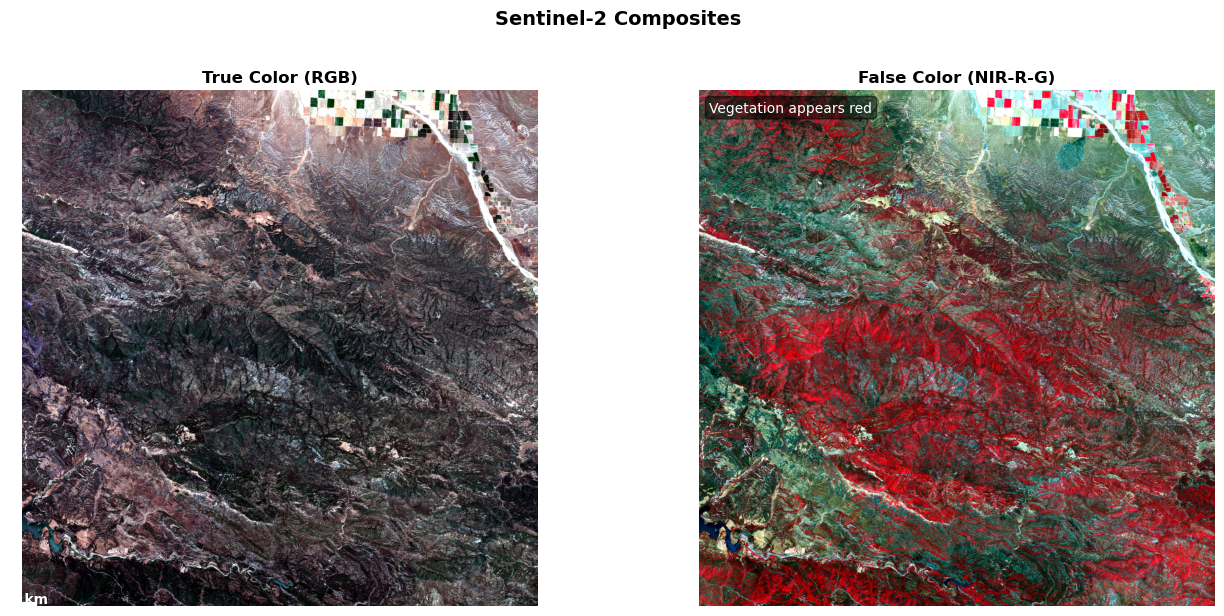

2025-10-05 16:25:12,489 - INFO - RGB composites created successfully


In [30]:
if band_data and all(k in band_data for k in ['B04', 'B03', 'B02']):
    # Create true color RGB composite using our helper function
    rgb_composite = create_rgb_composite(
        red=band_data['B04'],
        green=band_data['B03'],
        blue=band_data['B02'],
        enhance=True  # Apply contrast enhancement
    )

    logger.info(f"   RGB composite shape: {rgb_composite.shape}")

    # Create false color composite if NIR band is available
    false_color_composite = None
    if 'B08' in band_data:
        false_color_composite = create_rgb_composite(
            red=band_data['B08'],   # NIR in red channel
            green=band_data['B04'],  # Red in green channel
            blue=band_data['B03'],   # Green in blue channel
            enhance=True
        )
        logger.info(f"   False color composite created")

    # Visualize the composites
    if 'B08' in band_data:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    else:
        fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
        ax2 = None

    # True color
    ax1.imshow(rgb_composite)
    ax1.set_title('True Color (RGB)', fontsize=12, fontweight='bold')
    ax1.axis('off')

    # Add scale bar
    if 'transform' in locals() and transform:
        # Calculate pixel size in meters (approximate)
        pixel_size = abs(transform.a)  # Assuming square pixels
        scalebar_pixels = int(1000 / pixel_size)  # 1km scale bar
        if scalebar_pixels < rgb_composite.shape[1] / 4:
            ax1.plot([10, 10 + scalebar_pixels],
                    [rgb_composite.shape[0] - 20, rgb_composite.shape[0] - 20],
                    'w-', linewidth=3)
            ax1.text(10 + scalebar_pixels/2, rgb_composite.shape[0] - 30,
                    '1 km', color='white', ha='center', fontweight='bold')

    # False color if available
    if ax2 and false_color_composite is not None:
        ax2.imshow(false_color_composite)
        ax2.set_title('False Color (NIR-R-G)', fontsize=12, fontweight='bold')
        ax2.axis('off')
        ax2.text(0.02, 0.98, 'Vegetation appears red',
                transform=ax2.transAxes, color='white',
                fontsize=10, va='top',
                bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))

    plt.suptitle('Sentinel-2 Composites', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    logger.info("RGB composites created successfully")
else:
    logger.warning("Insufficient bands for RGB composite")

2025-10-05 16:25:13,747 - INFO - NDVI stats - Range: [-1.000, 0.770], Mean: 0.277
2025-10-05 16:25:13,815 - INFO - Land cover - Vegetation: 40.8%, Urban: 29.6%, Water: 0.2%


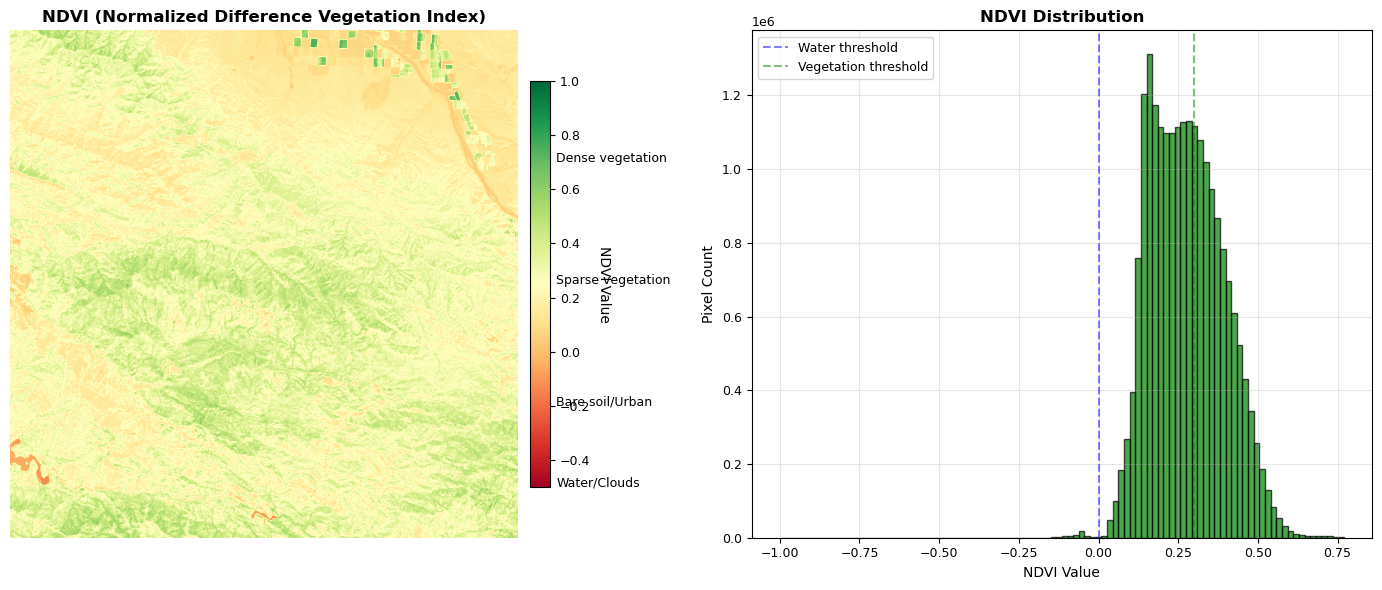

2025-10-05 16:25:15,308 - INFO - NDVI analysis complete


In [31]:
if band_data and 'B08' in band_data and 'B04' in band_data:
    # Calculate NDVI using our helper function
    ndvi = calculate_ndvi(
        nir=band_data['B08'],
        red=band_data['B04']
    )

    # Get NDVI statistics
    ndvi_stats = calculate_band_statistics(ndvi, "NDVI")

    # NDVI statistics
    logger.info(f"NDVI stats - Range: [{ndvi_stats['min']:.3f}, {ndvi_stats['max']:.3f}], Mean: {ndvi_stats['mean']:.3f}")

    # Interpret NDVI values
    vegetation_pixels = np.sum(ndvi > 0.3)
    water_pixels = np.sum(ndvi < 0)
    urban_pixels = np.sum((ndvi >= 0) & (ndvi <= 0.2))

    total_valid = ndvi_stats['valid_pixels']
    # Land cover interpretation
    veg_pct = vegetation_pixels/total_valid*100
    urban_pct = urban_pixels/total_valid*100
    water_pct = water_pixels/total_valid*100
    logger.info(f"Land cover - Vegetation: {veg_pct:.1f}%, Urban: {urban_pct:.1f}%, Water: {water_pct:.1f}%")

    # Create a detailed NDVI visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # NDVI map
    im = ax1.imshow(ndvi, cmap='RdYlGn', vmin=-0.5, vmax=1.0)
    ax1.set_title('NDVI (Normalized Difference Vegetation Index)', fontweight='bold')
    ax1.axis('off')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax1, shrink=0.8, pad=0.02)
    cbar.set_label('NDVI Value', rotation=270, labelpad=15)

    # Add interpretation labels to colorbar
    cbar.ax.text(1.3, 0.8, 'Dense vegetation', transform=cbar.ax.transAxes, fontsize=9)
    cbar.ax.text(1.3, 0.5, 'Sparse vegetation', transform=cbar.ax.transAxes, fontsize=9)
    cbar.ax.text(1.3, 0.2, 'Bare soil/Urban', transform=cbar.ax.transAxes, fontsize=9)
    cbar.ax.text(1.3, 0.0, 'Water/Clouds', transform=cbar.ax.transAxes, fontsize=9)

    # NDVI histogram
    ax2.hist(ndvi.flatten(), bins=100, color='green', alpha=0.7, edgecolor='black')
    ax2.axvline(0, color='blue', linestyle='--', alpha=0.5, label='Water threshold')
    ax2.axvline(0.3, color='green', linestyle='--', alpha=0.5, label='Vegetation threshold')
    ax2.set_xlabel('NDVI Value')
    ax2.set_ylabel('Pixel Count')
    ax2.set_title('NDVI Distribution', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    logger.info("NDVI analysis complete")
else:
    logger.warning("NIR and Red bands required for NDVI calculation")

In [32]:
if 'subset_bbox' in locals() or 'santa_barbara_bbox' in locals():
    # Use subset bbox if available, otherwise use the full AOI
    map_bbox = subset_bbox if 'subset_bbox' in locals() else santa_barbara_bbox
    center_lat = (map_bbox[1] + map_bbox[3]) / 2
    center_lon = (map_bbox[0] + map_bbox[2]) / 2

    # Create folium map
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=12,
        tiles='OpenStreetMap'
    )

    # Add different basemap options
    folium.TileLayer('CartoDB positron', name='Light Basemap').add_to(m)
    folium.TileLayer('CartoDB dark_matter', name='Dark Basemap').add_to(m)
    folium.TileLayer(
        tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr='Esri',
        name='Satellite Basemap',
        overlay=False,
        control=True
    ).add_to(m)

    # Add study area boundary
    folium.Rectangle(
        bounds=[[map_bbox[1], map_bbox[0]], [map_bbox[3], map_bbox[2]]],
        color='red',
        weight=3,
        fill=True,
        fillOpacity=0.1,
        popup='Study Area',
        tooltip='Analysis extent'
    ).add_to(m)

    # Add scene information if available
    if 'best_scene' in locals():
        scene_info = f"""
        <div style="font-family: Arial; width: 250px;">
        <h4>Sentinel-2 Scene Info</h4>
        <b>Date:</b> {best_scene.properties['datetime'].split('T')[0]}<br>
        <b>Cloud Cover:</b> {best_scene.properties['eo:cloud_cover']:.1f}%<br>
        <b>Tile:</b> {best_scene.properties.get('sentinel:utm_zone', 'N/A')}<br>
        <b>Processing:</b> Level 2A (Surface Reflectance)<br>
        </div>
        """

        folium.Marker(
            location=[center_lat, center_lon],
            popup=folium.Popup(scene_info, max_width=300),
            tooltip='Click for scene details',
            icon=folium.Icon(color='blue', icon='satellite', prefix='fa')
        ).add_to(m)

    # Add NDVI statistics if calculated
    if 'ndvi_stats' in locals():
        ndvi_info = f"""
        <div style="font-family: Arial;">
        <h4>NDVI Statistics</h4>
        <b>Mean:</b> {ndvi_stats['mean']:.3f}<br>
        <b>Std Dev:</b> {ndvi_stats['std']:.3f}<br>
        <b>Min:</b> {ndvi_stats['min']:.3f}<br>
        <b>Max:</b> {ndvi_stats['max']:.3f}<br>
        </div>
        """

        # Add a marker with NDVI stats
        folium.Marker(
            location=[center_lat + 0.02, center_lon],
            popup=folium.Popup(ndvi_info, max_width=200),
            tooltip='NDVI Statistics',
            icon=folium.Icon(color='green', icon='leaf', prefix='fa')
        ).add_to(m)

    # Add measurement tool
    from folium.plugins import MeasureControl
    m.add_child(MeasureControl())

    # Add fullscreen button
    from folium.plugins import Fullscreen
    Fullscreen().add_to(m)

    # Add layer control
    folium.LayerControl(position='topright').add_to(m)

    logger.info("Interactive map created with analysis overlays")
    m
else:
    logger.warning("No location data available for mapping")

2025-10-05 16:25:15,331 - INFO - Interactive map created with analysis overlays


In [33]:
m

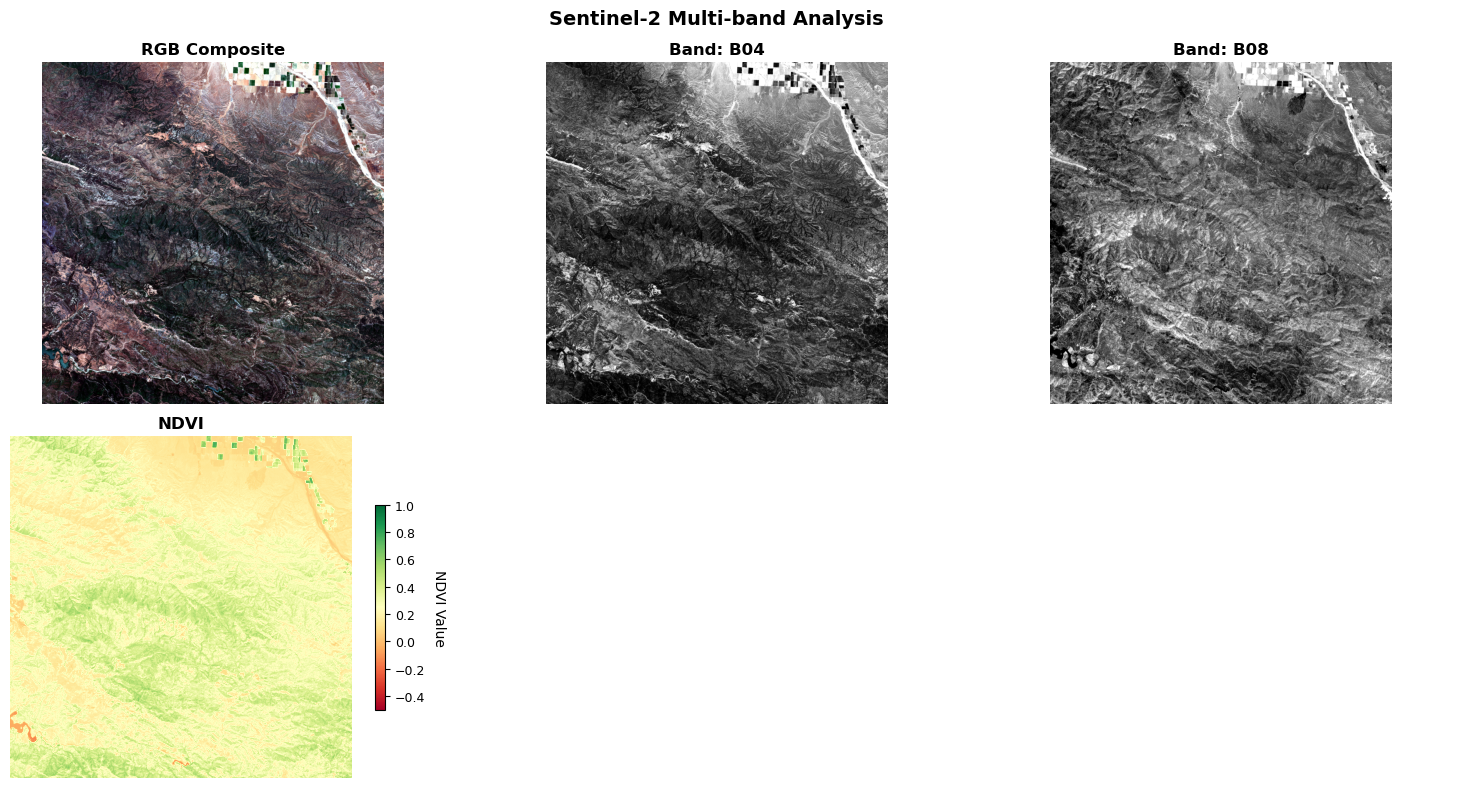

2025-10-05 16:25:21,812 - INFO - Multi-band comparison complete


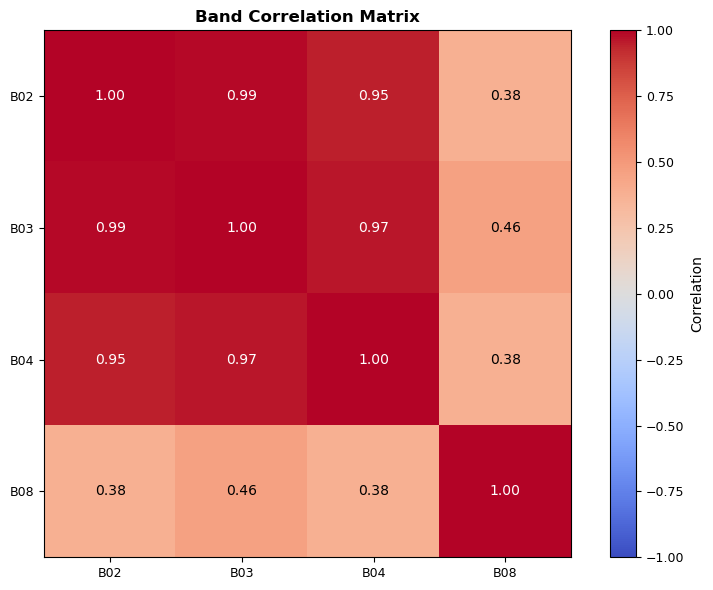

2025-10-05 16:25:23,468 - INFO - Band correlation analysis complete
2025-10-05 16:25:23,470 - INFO - Highest correlation: B03-B04 = 0.966


In [34]:

if band_data and 'rgb_composite' in locals():
    # Use our helper function for visualization
    plot_band_comparison(
        bands={'B04': band_data.get('B04'), 'B08': band_data.get('B08')} if band_data else {},
        rgb=rgb_composite if 'rgb_composite' in locals() else None,
        ndvi=ndvi if 'ndvi' in locals() else None,
        title="Sentinel-2 Multi-band Analysis"
    )

    logger.info("Multi-band comparison complete")

# Additional analysis: Band correlations
if band_data and len(band_data) > 2:
    # Calculate band correlations

    # Create correlation matrix
    band_names = [k for k in ['B02', 'B03', 'B04', 'B08'] if k in band_data]
    if len(band_names) >= 2:
        # Flatten bands and create DataFrame
        band_df = pd.DataFrame()
        for band_name in band_names:
            band_df[band_name] = band_data[band_name].flatten()

        # Calculate correlations
        correlations = band_df.corr()

        # Plot correlation matrix
        plt.figure(figsize=(8, 6))
        im = plt.imshow(correlations, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar(im, label='Correlation')

        # Add labels
        plt.xticks(range(len(band_names)), band_names)
        plt.yticks(range(len(band_names)), band_names)

        # Add correlation values
        for i in range(len(band_names)):
            for j in range(len(band_names)):
                plt.text(j, i, f'{correlations.iloc[i, j]:.2f}',
                        ha='center', va='center',
                        color='white' if abs(correlations.iloc[i, j]) > 0.5 else 'black')

        plt.title('Band Correlation Matrix', fontweight='bold')
        plt.tight_layout()
        plt.show()

        logger.info("Band correlation analysis complete")
        if 'B03' in band_names and 'B04' in band_names:
            logger.info(f"Highest correlation: B03-B04 = {correlations.loc['B03', 'B04']:.3f}")

In [46]:
from typing import Any, Optional, Dict, List


In [47]:
def export_analysis_results(
    output_dir: str = "week1_output",
    ndvi: Optional[np.ndarray] = None,
    rgb_composite: Optional[np.ndarray] = None,
    band_data: Optional[Dict[str, np.ndarray]] = None,
    transform: Optional[Any] = None,
    crs: Optional[Any] = None,
    scene_metadata: Optional[Dict] = None,
    ndvi_stats: Optional[Dict] = None,
    aoi_bbox: Optional[List[float]] = None,
    subset_bbox: Optional[List[float]] = None,
) -> Path:
    """Export analysis results to structured output directory.

    Args:
        output_dir: Output directory path
        ndvi: NDVI array to export
        rgb_composite: RGB composite array to export
        band_data: Dictionary of band arrays to cache
        transform: Geospatial transform
        crs: Coordinate reference system
        scene_metadata: Scene metadata dictionary
        ndvi_stats: NDVI statistics dictionary
        aoi_bbox: Area of interest bounding box
        subset_bbox: Subset bounding box

    Returns:
        Path to output directory
    """
    from pathlib import Path
    import json
    from datetime import datetime

    output_path = Path(output_dir)
    output_path.mkdir(exist_ok=True)
    cache_dir = output_path / "cache"
    cache_dir.mkdir(exist_ok=True)

    # Export NDVI if available
    if ndvi is not None and transform is not None and crs is not None:
        ndvi_path = output_path / "ndvi.tif"
        save_geotiff(
            data=ndvi,
            output_path=ndvi_path,
            transform=transform,
            crs=crs,
            band_names=["NDVI"],
        )
        logger.debug(f"Exported NDVI to {ndvi_path.name}")

    # Export RGB composite if available
    if rgb_composite is not None and transform is not None and crs is not None:
        rgb_bands = np.transpose(rgb_composite, (2, 0, 1))  # HWC to CHW
        rgb_path = output_path / "rgb_composite.tif"
        save_geotiff(
            data=rgb_bands,
            output_path=rgb_path,
            transform=transform,
            crs=crs,
            band_names=["Red", "Green", "Blue"],
        )
        logger.debug(f"Exported RGB composite to {rgb_path.name}")

    # Cache individual bands
    if band_data:
        cached_bands = []
        for band_name, band_array in band_data.items():
            if band_name.startswith("B") and isinstance(band_array, np.ndarray):
                band_path = cache_dir / f"{band_name}.npy"
                np.save(band_path, band_array)
                cached_bands.append(band_name)
        logger.debug(f"Cached {len(cached_bands)} bands: {cached_bands}")

    # Create metadata
    metadata = {
        "processing_date": datetime.now().isoformat(),
        "aoi_bbox": aoi_bbox,
        "subset_bbox": subset_bbox,
    }

    if scene_metadata:
        metadata["scene"] = scene_metadata
    if ndvi_stats:
        metadata["ndvi_statistics"] = ndvi_stats

    # Save metadata
    metadata_path = output_path / "metadata.json"
    with open(metadata_path, "w") as f:
        json.dump(metadata, f, indent=2, default=str)

    logger.info(f"Analysis results exported to: {output_path.absolute()}")
    return output_path

In [48]:
def load_week1_data(output_dir: str = "week1_output") -> Dict[str, Any]:
    """Load processed data from Week 1."""
    from pathlib import Path
    import json
    import numpy as np
    import rasterio

    output_path = Path(output_dir)
    if not output_path.exists():
        raise FileNotFoundError(f"Directory not found: {output_path}")

    data = {}

    # Load metadata
    metadata_path = output_path / "metadata.json"
    if metadata_path.exists():
        with open(metadata_path) as f:
            data["metadata"] = json.load(f)

    # Load NDVI
    ndvi_path = output_path / "ndvi.tif"
    if ndvi_path.exists():
        with rasterio.open(ndvi_path) as src:
            data["ndvi"] = src.read(1)
            data["transform"] = src.transform
            data["crs"] = src.crs

    # Load cached bands
    cache_dir = output_path / "cache"
    if cache_dir.exists():
        data["bands"] = {}
        for band_file in cache_dir.glob("*.npy"):
            band_name = band_file.stem
            data["bands"][band_name] = np.load(band_file)

    return data


# Export the analysis results
scene_meta = None
if "best_scene" in locals():
    scene_meta = {
        "id": best_scene.id,
        "date": best_scene.properties["datetime"],
        "cloud_cover": best_scene.properties["eo:cloud_cover"],
        "platform": best_scene.properties.get("platform", "Unknown"),
    }

output_dir = export_analysis_results(
    ndvi=ndvi if "ndvi" in locals() else None,
    rgb_composite=rgb_composite if "rgb_composite" in locals() else None,
    band_data=band_data if "band_data" in locals() else None,
    transform=transform if "transform" in locals() else None,
    crs=crs if "crs" in locals() else None,
    scene_metadata=scene_meta,
    ndvi_stats=ndvi_stats if "ndvi_stats" in locals() else None,
    aoi_bbox=santa_barbara_bbox if "santa_barbara_bbox" in locals() else None,
    subset_bbox=subset_bbox if "subset_bbox" in locals() else None,
)

logger.info("Data exported - use load_week1_data() to reload")

2025-10-05 16:30:16,944 - INFO - 💾 Saved GeoTIFF: week1_output/ndvi.tif
2025-10-05 16:30:16,946 - INFO -    Shape: (4626, 4626)
2025-10-05 16:30:16,947 - INFO -    CRS: EPSG:32611
2025-10-05 16:30:16,948 - INFO -    Compression: deflate, tiled
2025-10-05 16:30:27,684 - INFO - 💾 Saved GeoTIFF: week1_output/rgb_composite.tif
2025-10-05 16:30:27,686 - INFO -    Shape: (3, 4626, 4626)
2025-10-05 16:30:27,686 - INFO -    CRS: EPSG:32611
2025-10-05 16:30:27,687 - INFO -    Compression: deflate, tiled
2025-10-05 16:30:28,494 - INFO - Analysis results exported to: /home/sarahpayne/gfms-from-scratch.github.io/week1_output
2025-10-05 16:30:28,496 - INFO - Data exported - use load_week1_data() to reload
